In [3]:
import pandas as pd
import numpy as np
import pickle
import os
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df1  = pd.read_csv('pik_cat_link.csv')
df1

,user_id,pik_id,pik_title,category_id,cat_title,link_id,link_title,topic_label
0,3,94,portland maine trip,405,Trip,1379,visit portland maine travel planning official ...,3
1,13,71,how to find the best movie,291,movie DB,873,the 50 best movies on netflix right now,14
2,13,71,how to find the best movie,292,Streaming sites,905,repelis portal de peliculas online gratis sin ...,14
3,13,190,marketing to nordic countries,761,12,903,youtube,13
4,13,226,places to visit on bali,768,beach,2097,kuta wikipedia,3
...,...,...,...,...,...,...,...,...
37453,10597,28225,ott,91921,미분류,624556,ott ott,14
37454,10597,28225,ott,91921,미분류,624557,lg iptv u tv,14
37455,10633,28237,20 aiml,91966,VC,624704,nfx,2
37456,10633,28237,20 aiml,91966,VC,624705,nfx,2


In [5]:
df2  = pd.read_csv('Labeling_data.csv')
df2

,픽 아이디,픽 제목,생성 일시,공개/비공개,언어,카테고리 수,링크 수,주제 코드,주제
0,20,Pitch Perfect for Startups,2019-02-21 04:27:51.368 +0900,public,en,5,15,12,사업
1,21,Brand Creation for Startups,2019-02-21 04:36:54.550 +0900,public,en,10,28,12,사업
2,22,The Art of Surveys,2019-02-21 05:58:19.196 +0900,public,en,5,11,14,문화생활
3,23,Creating a PreLaunch Landing Page that Converts,2019-02-21 06:08:14.946 +0900,public,en,9,32,1,개발
4,24,From Bronze to Grand Master: Overwatch,2019-02-21 06:33:27.223 +0900,public,en,7,19,9,게임
...,...,...,...,...,...,...,...,...,...
5782,28217,API 모음,2023-02-11 23:01:12.953 +0900,public,ko,3,10,1,개발
5783,28225,OTT,2023-02-12 15:47:59.872 +0900,public,ko,1,4,14,문화생활
5784,28227,nestjs 공식문서 번역 잘 된곳,2023-02-12 19:02:26.783 +0900,public,ko,1,2,1,개발
5785,28230,아마추어 바텐더-칵테일,2023-02-12 19:59:57.264 +0900,public,ko,3,7,15,취미


여러가지의 문서들을 군집화시켜보고 특정 하나의 문서가 다른 문서들간의 유사도를 측정해보는 방법에 대해서 알아본다. 군집분석은 비지도 학습으로 비슷한 데이터들끼리 서로 군집을 이루는 것을 이루는 것을 말한다. 이러한 방법은 텍스트로 이러어진 문서 데이터에도 적용이 된다. 단어 발생 빈도수에 기반하는 BOW(Bag Of Words) 방식을 이용해 Featrue(문서들을 이루고 있는 단어들)를 벡터화시키거나 단어들간 의미 관계 즉, 단어 백터들간의 방향을 고려해 Word embedding을 통해 백터화 시킨다.

BOW에 기반한 Tf-idf 방법을 사용한다. 다른 BOW방식인 Count Vectorizer는 단순히 그저 단어 발생 빈도수에만 초점을 맞추기 때문에 여러가지 문서들간의 관계를 잘 고려하지 못한다.

K-means를 활동한 Document Clustering

문서 군집화를 수행하기 위해서 K-means 군집 알고리즘이 자주 이용된다고 한다. 이유는 정확한 모르겠지만 K-means알고리즘은 이상치에 민감한 알고리즘인데 텍스트 데이터에서는 수치형 데이터와는 달리 이상치 발생 빈도수가 현저하게 적지 않을까라는 추론도 해본다.

In [6]:
# K-means를 이용한 문서 군집화를 수행해보자. 
# 데이터를 불러오고 전처리하는 코드과정.

In [12]:
df3  = pd.read_csv('Labeling_data.csv')

pick = []


ddf = pd.DataFrame([[pick1]])
ddf
ddf

# df4 = df3.copy(deep=True)
# df4['픽 제목'] = pick1
# for count[] in df3['주제'].value_counts():
#     print(count)
lis = [k for k  in df3['주제'].value_counts().to_dict()]
lis

ddfff = pd.DataFrame(lis)
ddfff

NameError: name 'pick1' is not defined

In [13]:
pick0 = df3['픽 제목'][df3['주제'] =='기타'].to_list()
pick1 = df3['픽 제목'][df3['주제'] =='개발'].to_list()
pick2 = df3['픽 제목'][df3['주제'] =='AI'].to_list()
pick3 = df3['픽 제목'][df3['주제'] =='여행'].to_list()
pick4 = df3['픽 제목'][df3['주제'] =='맛집'].to_list()
pick5 = df3['픽 제목'][df3['주제'] =='금융'].to_list()
pick6 = df3['픽 제목'][df3['주제'] =='디자인'].to_list()
pick7 = df3['픽 제목'][df3['주제'] =='생활'].to_list()
pick8 = df3['픽 제목'][df3['주제'] =='사회'].to_list()
pick9 = df3['픽 제목'][df3['주제'] =='게임'].to_list()
pick10 = df3['픽 제목'][df3['주제'] =='스포츠'].to_list()
pick11 = df3['픽 제목'][df3['주제'] =='요리'].to_list()
pick12 = df3['픽 제목'][df3['주제'] =='사업'].to_list()
pick13 = df3['픽 제목'][df3['주제'] =='마케팅'].to_list()
pick14 = df3['픽 제목'][df3['주제'] =='문화생활'].to_list()
pick15 = df3['픽 제목'][df3['주제'] =='취미'].to_list()
pick16 = df3['픽 제목'][df3['주제'] =='교육'].to_list()

In [14]:
Pick_df = pd.DataFrame({'Category':'기타', 'PickName':[pick0]})

Pick_df2 = pd.DataFrame(Pick_df, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
Pick_df2.loc[1] = '개발',pick1
Pick_df2.loc[2] = 'AI',pick2
Pick_df2.loc[3] = '여행',pick3
Pick_df2.loc[4] = '맛집',pick4
Pick_df2.loc[5] = '금융',pick5
Pick_df2.loc[6] = '디자인',pick6
Pick_df2.loc[7] = '생활',pick7
Pick_df2.loc[8] = '사회',pick8
Pick_df2.loc[9] = '게임',pick9
Pick_df2.loc[10] = '스포츠',pick10
Pick_df2.loc[11] = '요리',pick11
Pick_df2.loc[12] = '사업',pick12
Pick_df2.loc[13] = '마케팅',pick13
Pick_df2.loc[14] = '문화생활',pick14
Pick_df2.loc[15] = '취미',pick15
Pick_df2.loc[16] = '교육',pick16
Pick_final = Pick_df2

Pick_final


c:\Users\user\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,Category,PickName
0,기타,"[News Sources, Ain't No Time For That. Grocery..."
1,개발,[Creating a PreLaunch Landing Page that Conver...
2,AI,"[Data, Voice Command Innovations with AI, Natu..."
3,여행,"[Things To Do in Boston, MA, A weekend in San ..."
4,맛집,"[NYC Food Instagrams, Awesome Restaurant, 밥과 후..."
5,금융,"[Raising Capital in Boston, Taking Control of ..."
6,디자인,"[원단이 필요할 때! 각종 원단 사이트 모음, Design Tips, 색다른 공간활..."
7,생활,"[Taking My Photography Beyond My Iphone, Stres..."
8,사회,"[Journal, 아이겐코리아 보도자료, 반도체 산업 이해, 알고보면 쓸데많은 생활..."
9,게임,"[From Bronze to Grand Master: Overwatch, Brawl..."


In [15]:
Pick_final['PickName'] = Pick_final['PickName'].apply(lambda x: str(x).replace('[','').replace(']',''))
Pick_final

,Category,PickName
0,기타,"'News Sources', ""Ain't No Time For That. Groce..."
1,개발,'Creating a PreLaunch Landing Page that Conver...
2,AI,"'Data', 'Voice Command Innovations with AI', '..."
3,여행,"'Things To Do in Boston, MA', 'A weekend in Sa..."
4,맛집,"'NYC Food Instagrams', 'Awesome Restaurant', '..."
5,금융,"'Raising Capital in Boston', 'Taking Control o..."
6,디자인,"'원단이 필요할 때! 각종 원단 사이트 모음', 'Design Tips', '색다른..."
7,생활,"'Taking My Photography Beyond My Iphone', 'Str..."
8,사회,"'Journal', '아이겐코리아 보도자료', '반도체 산업 이해', '알고보면 쓸..."
9,게임,"'From Bronze to Grand Master: Overwatch', 'Bra..."


In [16]:
#특정 행 이름 바꾸기
# 'ddfff.rename(index={0:'기타',1:'',2:'',3:'',4:'',5:'',6:'',7:'',8:'',9:'',10:'',11:'',12:'',13:'',14:'',15:'',16:''},inplace=True)
# print(ddfff)
Pick_final['PickName']

0     'News Sources', "Ain't No Time For That. Groce...
1     'Creating a PreLaunch Landing Page that Conver...
2     'Data', 'Voice Command Innovations with AI', '...
3     'Things To Do in Boston, MA', 'A weekend in Sa...
4     'NYC Food Instagrams', 'Awesome Restaurant', '...
5     'Raising Capital in Boston', 'Taking Control o...
6     '원단이 필요할 때! 각종 원단 사이트 모음', 'Design Tips', '색다른...
7     'Taking My Photography Beyond My Iphone', 'Str...
8     'Journal', '아이겐코리아 보도자료', '반도체 산업 이해', '알고보면 쓸...
9     'From Bronze to Grand Master: Overwatch', 'Bra...
10    'Training For A Marathon', "Women's World Cup ...
11    'Extra Virgin Olive Oil', '죽 끓이기', 'Vegan Rece...
12    'Pitch Perfect for Startups', 'Brand Creation ...
13    'Sending Out Your First Cold Marketing Email',...
14    'The Art of Surveys', 'Modern Classical Music ...
15    'Plant defense system', '식물', '여자쇼핑몰 싹 다 여기 집합...
16    '30대 한국인이 미국에 유학와서 영어로 살아남기', 'Summer Is Comin...
Name: PickName, dtype: object

In [70]:
# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import string
# string.puncitaion에 문자열의 모든 구두점이 들어있음
# 이를 활용해서 Tokenize시킬 때 구두점들을 제외하기 위한 것
# ord('문자열') => 문자열의 ASCII 코드를 반환해줌!
# duct(key, value)형태로 모든 구두점의 각 ASCII코드를 KEY값으로 넣어주자!

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 토큰화한 각 단어들의 원형들을 리스트로 담아서 반환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
# 텍스트를 Input으로 넣어서 토큰화시키고 토큰화된 단어들의 원형들을 리스트로 담아 반환

def LemNormalize(text):
    # translate인자에 구두점 dict넣어주어서 구두점 삭제해준 상태로 토큰화시키기
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# tf-idf 백터화시키면서 cusotmized해준 토큰화+어근추출 방식 tokenizer인자에 넣어주기
# 백터화시킬 tf-idf 도구 옵션 추가해서 구축
# 1,2gram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
# fit_transform으로 위해서 구축한 도구로 텍스트 백터화
ftr_vect = tfidf_vect.fit_transform(Pick_final['PickName'])
ftr_vect

c:\Users\user\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


<17x20380 sparse matrix of type '<class 'numpy.float64'>'
	with 23467 stored elements in Compressed Sparse Row format>

In [71]:
# K-means로 3개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 document_df에 추가하기
Pick_final['cluster_label'] = cluster_label
print(Pick_final.sort_values(by=['cluster_label']))

   Category                                           PickName  cluster_label
16       교육  '30대 한국인이 미국에 유학와서 영어로 살아남기', 'Summer Is Comin...              0
1        개발  'Creating a PreLaunch Landing Page that Conver...              0
10      스포츠  'Training For A Marathon', "Women's World Cup ...              0
7        생활  'Taking My Photography Beyond My Iphone', 'Str...              0
6       디자인  '원단이 필요할 때! 각종 원단 사이트 모음', 'Design Tips', '색다른...              0
12       사업  'Pitch Perfect for Startups', 'Brand Creation ...              1
0        기타  'News Sources', "Ain't No Time For That. Groce...              1
2        AI  'Data', 'Voice Command Innovations with AI', '...              1
8        사회  'Journal', '아이겐코리아 보도자료', '반도체 산업 이해', '알고보면 쓸...              1
4        맛집  'NYC Food Instagrams', 'Awesome Restaurant', '...              2
3        여행  'Things To Do in Boston, MA', 'A weekend in Sa...              2
5        금융  'Raising Capital in Boston', 'Taking Control o...  

In [72]:
# 문서의 feature(단어별) cluster_centers_확인해보자
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)
# shape의 행은 클러스터 레이블, 열은 백터화 시킨 단어들

(4, 20380)
[[0.         0.         0.         ... 0.00333508 0.         0.        ]
 [0.00429379 0.00429379 0.         ... 0.         0.00429379 0.00429379]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00407481 ... 0.         0.         0.        ]]


In [73]:
def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features=10):
    cluster_details = {}
    # 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬  후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]

    # 개별 클러스터 레이블별로
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # 각 feature별 center값들 정렬한 인덱스 중 상위 10개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 10개 feature들의 center값들 반환
        # 반환하게 되면 array이기 때문에 리스토로 바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()

        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_features_value'] = top_ftr_val
        # 해당 cluseter_num으로 분류된 파일명(문서들) 넣어주기
        filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['Category']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array -> list로 변환
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['filenames'][:5]}")
        print('-'*20)

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
cluster_data=Pick_final, feature_names=feature_names, cluster_num=4, top_n_features=10)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 10개 feature단어들:
 ['인테리어', '개발', '운동', '정보 모음', '디자인', '인테리어 정보', '꿀팁', '사이트', '운동 추천', '업무']

Cluster 0으로 분류된 문서들:
['개발', '디자인', '생활', '스포츠', '교육']
--------------------
#####Cluster Num: 1

상위 10개 feature단어들:
 ['피큐레잇', '스타트업', 'ai', '뉴스레터', '데이터', 'startup', 'x', 'pikurate', '창업', '유용한 뉴스레터']

Cluster 1으로 분류된 문서들:
['기타', 'AI', '사회', '사업']
--------------------
#####Cluster Num: 2

상위 10개 feature단어들:
 ['맛집', '제주', '핫플', '여행을 위한', '여행을', '맛집 핫플', '핫플 브이로그', '브이로그', '제주 여행을', '위한 맛집']

Cluster 2으로 분류된 문서들:
['여행', '맛집', '금융']
--------------------
#####Cluster Num: 3

상위 10개 feature단어들:
 ['레시피', '끝내기 sn', '마케팅', '영화', 'sn 마케팅', '하나로 끝내기', '끝내기', '마케팅 이거', '하나로', '이거 하나로']

Cluster 3으로 분류된 문서들:
['게임', '요리', '마케팅', '문화생활', '취미']
--------------------


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


2. 문서들간의 유사도 측정하기

문서들간의 유사도는 어떻게 측정할까? 이는 단어의 의미적인 관계를 고려해야하기 떄문에 단어를 백터화하여 백터들 간의 거리를 측정한다. 백터간의 거리를 대표적인 방법으로는 '유클리디안 거리' 있지만 '유클리디안 거리'는 이는 단어 빈도수 측면에서 한계가 존재한다.
따라서 코사인 유사도(cosine similiarity)를 사용한다. 즉, 백터들 간의 사잇값을 계산하여 유사도를 측정하게 된다.

코사인 유사도는 두 벡터간의 각도에 따라 -1~ 1 사의 값으로 계산이 된다. 그리고 그 각도에 따라 두 벡터(NLP에서는 2개의 단어들)간의 관계를 파악할 수 있다.

Cosine 0 : 두 벡터(단어)간에 매우 유사한 관계를 지닌다. Cosine Similarity 값은 1이 된다.

Cosine 90 : 두 벡터간에 관계가 없음을 의미한다. Cosine Similarity값은 0이 된다.

Cosine 180 : 두 벡터간에 반대관계를 의미한다. Cosine Similarity의 값은 -1이 된다.

하지만 텍스트 즉, 단어들을 Feature화 시킬 떄 음수값이 나올 수 없으므로 Cosine 180인 경우는 존재하지 않는다. 따라서 단어 벡터들간의 유사도는 0~1사이의 값으로 나오게 된다.

이제 K-means 실습 떄 수행했던 문서들 간의 군집화 결과를 바탕으로 특정 클러스터 레이블 문서 하나를 선정하고 그와 똑같은 label 문서들 간의 유사도를 직접 측정해보자.

In [74]:
Pick_final[Pick_final['cluster_label']==0]

,Category,PickName,cluster_label
1,개발,'Creating a PreLaunch Landing Page that Conver...,0
6,디자인,"'원단이 필요할 때! 각종 원단 사이트 모음', 'Design Tips', '색다른...",0
7,생활,"'Taking My Photography Beyond My Iphone', 'Str...",0
10,스포츠,"'Training For A Marathon', ""Women's World Cup ...",0
16,교육,"'30대 한국인이 미국에 유학와서 영어로 살아남기', 'Summer Is Comin...",0


In [75]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출

from sklearn.metrics.pairwise import cosine_similarity

AI_idx = Pick_final[Pick_final['cluster_label']==0].index
print("AI 카테고리로 클러스팅된 문서들의 인덱스:\n",AI_idx)
print()

# AI 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = Pick_final.iloc[AI_idx[2]]['Category']
print("##유사도 비교 기준 문서 이름:",comparison_doc, '##')
print()

# 위에서 추출한 AI 카테고리로 클러스터링된 문서들의 인덱스 중 2번 인덱스(비교기준 문서)제외한
# 다른 문서들과의 유사도 측정

similarity = cosine_similarity(ftr_vect[AI_idx[2]], ftr_vect[AI_idx])
print(similarity)

AI 카테고리로 클러스팅된 문서들의 인덱스:
 Int64Index([1, 6, 7, 10, 16], dtype='int64')

##유사도 비교 기준 문서 이름: 생활 ##

[[0.05193011 0.06893146 1.         0.04357971 0.12340491]]


In [76]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'Malgun Gothic'

Int64Index([16, 6, 1, 10], dtype='int64')
[0.12340491 0.06893146 0.05193011 0.04357971]

길이 비교 4 4



Text(0.5, 1.0, '생활')

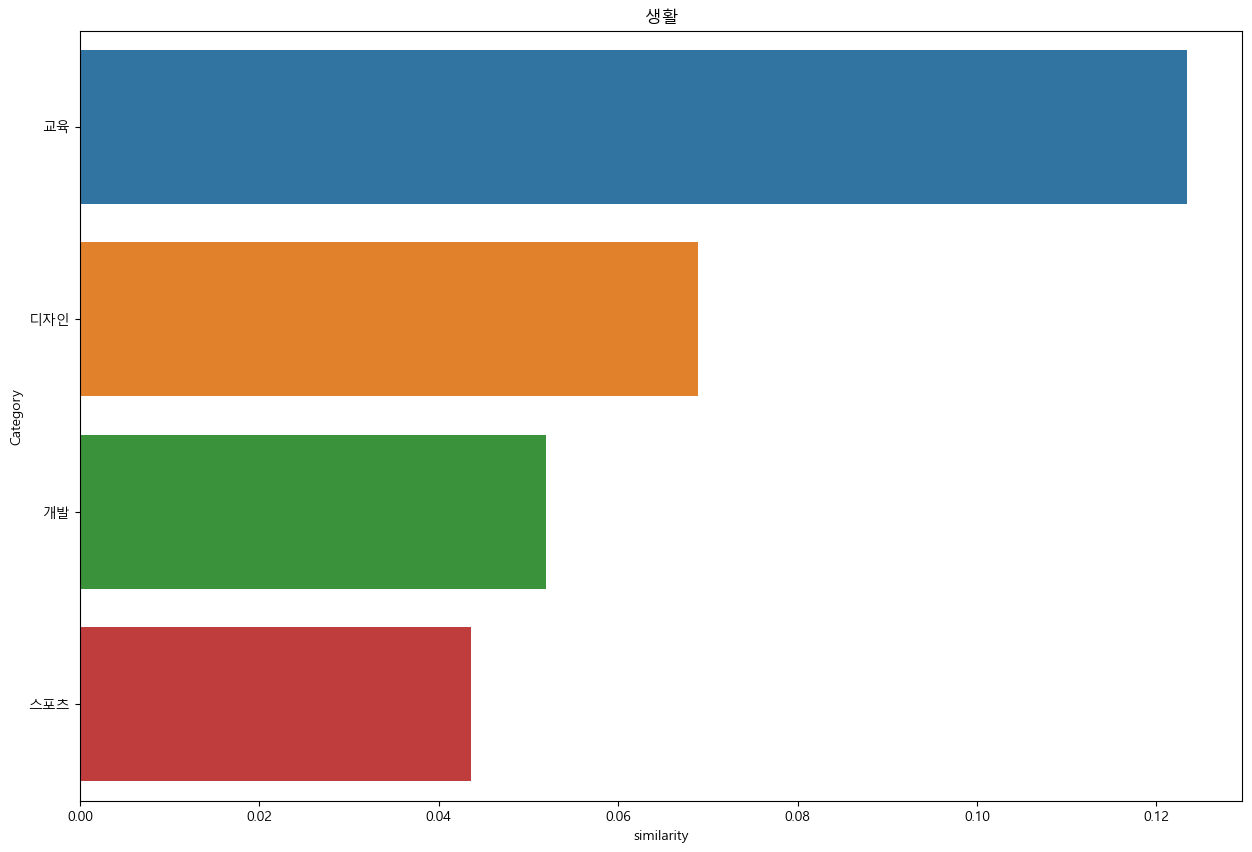

In [77]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# array 내림차순으로 정렬한 후 인덱스 반환 [:.::-1] 모든 행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교 문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 AI_Index(laber=2인 즉, ai와 관련된 내용의 문서이름들의 index들에서 재정렬)
# index로 넣으러면 1차원으로 reshape해주기!
AI_sorted_idx = AI_idx[sorted_idx.reshape(-1,)]
AI_sim_values = np.sort(similarity.reshape(-1,))[::-1]
AI_sim_values = AI_sim_values[1:]
# 이렇게 되면 비교 문서와 가장 유사한 순으로 '해당 문서의 index-유사도값'으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 컬럼으로 넣어주기
print(AI_sorted_idx)
print(AI_sim_values)
print()
print("길이 비교", len(AI_sorted_idx), len(AI_sim_values))
print()
# 빈 데이터프레임 생성
AI_sim_df = pd.DataFrame()
# 
AI_sim_df['Category'] = Pick_final.iloc[AI_sorted_idx]['Category']
AI_sim_df['similarity'] = AI_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=AI_sim_df, x='similarity', y='Category')
plt.title(comparison_doc)